In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8518518518518519, Loss: 0.5905197638052481
Checkpoint 20, Accuracy: 0.8765432098765432, Loss: 0.5546488232082791
Checkpoint 30, Accuracy: 0.8703703703703703, Loss: 0.5747186872694228
Checkpoint 40, Accuracy: 0.8580246913580247, Loss: 0.5493252012464735
Checkpoint 50, Accuracy: 0.8641975308641975, Loss: 0.5084222511008933
Checkpoint 60, Accuracy: 0.9012345679012346, Loss: 0.49910153283013237
Checkpoint 70, Accuracy: 0.8888888888888888, Loss: 0.4681776188038014
Checkpoint 80, Accuracy: 0.9074074074074074, Loss: 0.42040326860215926
Checkpoint 90, Accuracy: 0.9135802469135802, Loss: 0.39586250870316114
Checkpoint 100, Accuracy: 0.9382716049382716, Loss: 0.29689001154016564
Checkpoint 110, Accuracy: 0.9506172839506173, Loss: 0.24768350742481374
Checkpoint 120, Accuracy: 0.9506172839506173, Loss: 0.22583749559190539
Checkpoint 130, Accuracy: 0.9506172839506173, Loss: 0.20111287081683124
Checkpoint 140, Accuracy: 0.9567901234567902, Loss: 0.17495955361260307
Checkpo

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [9.9657214e-01 9.4524841e-04 2.4826177e-03]
[1. 0. 0.] <-> [0.9829533  0.00185583 0.01519079]
[1. 0. 0.] <-> [0.99719465 0.00106388 0.00174145]
[0. 1. 0.] <-> [0.48259512 0.51279795 0.00460699]
[0. 0. 1.] <-> [0.01254547 0.00194625 0.98550826]
[1. 0. 0.] <-> [0.17311062 0.00675558 0.8201338 ]
[1. 0. 0.] <-> [0.9959758  0.00129462 0.00272958]
[1. 0. 0.] <-> [9.9690717e-01 8.2710484e-04 2.2656817e-03]
[1. 0. 0.] <-> [0.9970974  0.00101905 0.00188359]
[1. 0. 0.] <-> [0.9968426  0.00134446 0.00181293]
[1. 0. 0.] <-> [0.9914658  0.00133872 0.00719539]
[0. 1. 0.] <-> [0.27156284 0.72373414 0.00470294]
[1. 0. 0.] <-> [0.9954491  0.00266992 0.00188095]
[1. 0. 0.] <-> [0.99228233 0.00129328 0.00642443]
[1. 0. 0.] <-> [0.9632086  0.00279701 0.03399435]
[1. 0. 0.] <-> [0.99539256 0.00276681 0.00184064]
[0. 0. 1.] <-> [0.01304725 0.00198024 0.98497254]
[0. 1. 0.] <-> [1.3921993e-02 9.8517436e-01 9.0361445e-04]
[1. 0. 0.] <-> [0.96649665 0.00285721 0.03064615]
[0. 0. 1.] <-> [0.01268

In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

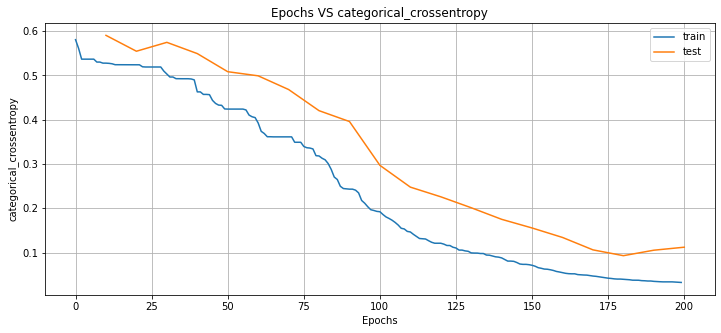

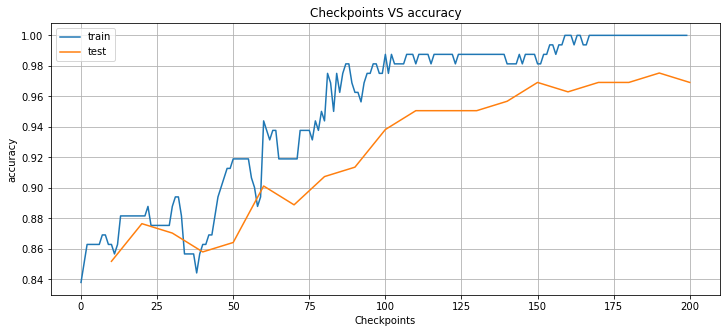

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8518518518518519, 'mean_square_error': 0.3298541358589136, 'categorical_crossentropy': 0.5905197638052481, 'essential_metrics': {0: {'tp_hit': 67, 'fp_hit': 14, 'tn_hit': 18, 'fn_hit': 9}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 6}, 2: {'tp_hit': 6, 'fp_hit': 10, 'tn_hit': 83, 'fn_hit': 9}}, 'checkpoint': 10} 


{'accuracy': 0.8765432098765432, 'mean_square_error': 0.29926182449217903, 'categorical_crossentropy': 0.5546488232082791, 'essential_metrics': {0: {'tp_hit': 73, 'fp_hit': 15, 'tn_hit': 17, 'fn_hit': 3}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 7}, 2: {'tp_hit': 5, 'fp_hit': 5, 'tn_hit': 88, 'fn_hit': 10}}, 'checkpoint': 20} 


{'accuracy': 0.8703703703703703, 'mean_square_error': 0.315732481799889, 'categorical_crossentropy': 0.5747186872694228, 'essential_metrics': {0: {'tp_hit': 71, 'fp_hit': 14, 'tn_hit': 18, 'fn_hit': 5}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 7}, 2: {'tp_hit': 6, 'fp_hit': 7, 'tn_hit': 86, 'fn_h

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 1.1091954  -1.9856927  -3.          0.89833874  1.3570881 ]
 bias: -3.0

Neuron 1: weights:
[-1.2005873   3.          0.01869258 -0.8012144  -1.9562775 ]
 bias: 3.0

Neuron 2: weights:
[-1.3311474  2.4376776  1.9105217  1.1509115 -1.9727094]
 bias: -3.0

Neuron 3: weights:
[-1.9741473  3.         1.8900069 -3.        -0.3063924]
 bias: -3.0

$
Layer 2
Neuron 0: weights:
[-2.2869835  3.        -3.        -3.       ]
 bias: 2.1219496726989746

Neuron 1: weights:
[ 0.06968434 -0.52157724  3.          3.        ]
 bias: -2.097022533416748

Neuron 2: weights:
[ 3.        -3.         0.7133796 -2.5273836]
 bias: 1.2011913061141968

$

